Note: you may need to restart the kernel to use updated packages.
Historical VaR at 95% confidence: 0.0293
Parametric VaR at 95% confidence: 0.0308
Monte Carlo VaR at 95% confidence: 0.0311


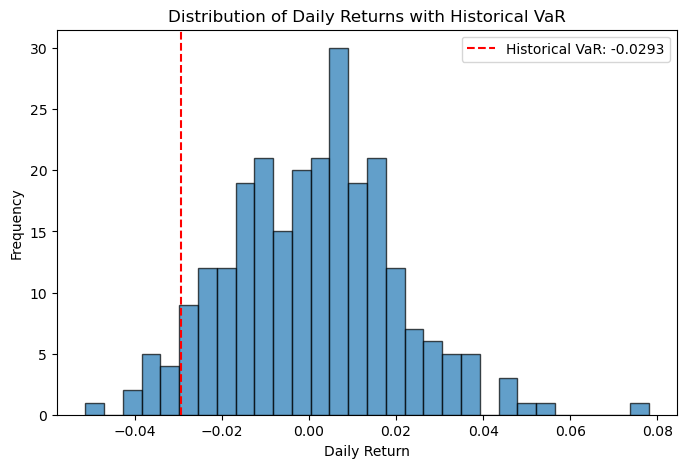

In [1]:
import numpy as np
import pandas as pd
%pip install matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st

def calculate_historical_var(returns, confidence_level=0.95):
    """
    Calculate Historical VaR.
    
    Parameters:
        returns (pd.Series): Historical returns.
        confidence_level (float): Confidence level (e.g., 0.95 for 95%).
        
    Returns:
        float: Historical VaR value.
    """
    # Sort returns in ascending order
    sorted_returns = np.sort(returns)
    # Calculate the index corresponding to the (1 - confidence_level) percentile
    index = int((1 - confidence_level) * len(sorted_returns))
    # VaR is the absolute value of the return at this index
    var = abs(sorted_returns[index])
    return var

def calculate_parametric_var(returns, confidence_level=0.95):
    """
    Calculate Parametric VaR assuming a normal distribution of returns.
    
    Parameters:
        returns (pd.Series): Historical returns.
        confidence_level (float): Confidence level.
        
    Returns:
        float: Parametric VaR value.
    """
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    # Get the z-score for the desired confidence level
    z = st.norm.ppf(1 - confidence_level)
    # Calculate VaR using the normal distribution formula
    var = abs(mean_return + z * std_return)
    return var

def calculate_monte_carlo_var(returns, num_simulations=10000, confidence_level=0.95):
    """
    Calculate Monte Carlo VaR by simulating returns.
    
    Parameters:
        returns (pd.Series): Historical returns.
        num_simulations (int): Number of simulated returns.
        confidence_level (float): Confidence level.
        
    Returns:
        float: Monte Carlo VaR value.
    """
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    # Generate simulated returns assuming a normal distribution
    simulated_returns = np.random.normal(mean_return, std_return, num_simulations)
    simulated_returns_sorted = np.sort(simulated_returns)
    index = int((1 - confidence_level) * num_simulations)
    var = abs(simulated_returns_sorted[index])
    return var

def main():
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Generate synthetic daily returns (e.g., for 252 trading days, about 1 year)
    # Assuming a mean daily return of 0.1% and volatility (std dev) of 2%
    returns = np.random.normal(0.001, 0.02, 252)
    returns_series = pd.Series(returns)
    
    # Define the confidence level (e.g., 95% confidence)
    confidence_level = 0.95
    
    # Calculate VaR using different methods
    historical_var = calculate_historical_var(returns_series, confidence_level)
    parametric_var = calculate_parametric_var(returns_series, confidence_level)
    monte_carlo_var = calculate_monte_carlo_var(returns_series, num_simulations=10000, confidence_level=confidence_level)
    
    # Print the results
    print(f"Historical VaR at {confidence_level*100:.0f}% confidence: {historical_var:.4f}")
    print(f"Parametric VaR at {confidence_level*100:.0f}% confidence: {parametric_var:.4f}")
    print(f"Monte Carlo VaR at {confidence_level*100:.0f}% confidence: {monte_carlo_var:.4f}")
    
    # Plot the distribution of returns and mark the historical VaR threshold
    plt.figure(figsize=(8, 5))
    plt.hist(returns, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(x=-historical_var, color='red', linestyle='--', 
                label=f'Historical VaR: {-historical_var:.4f}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.title('Distribution of Daily Returns with Historical VaR')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
